# Problem Statement

- Perform a comprehensive analysis of employee performance at INX Future Inc. to identify top performers, evaluate performance metrics, understand employee engagement, and recommend strategies for improvement. 
- Deliver a detailed report with actionable insights and recommendations to enhance organizational efficiency and productivity.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
!pip install xlrd

In [3]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
df.duplicated('EmpNumber').sum()

0

In [5]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
df.shape

(1200, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## EDA

#### Univariant Analysis

In [10]:
df.columns.tolist()

['EmpNumber',
 'Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating']

In [11]:
df_num=df.select_dtypes(['int','float']).columns.tolist()
df_num

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [12]:
df.select_dtypes(['object','category']).columns.tolist()


['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [13]:
df_cat=['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [14]:
df_cat

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### ploting graphs for univariant analysis

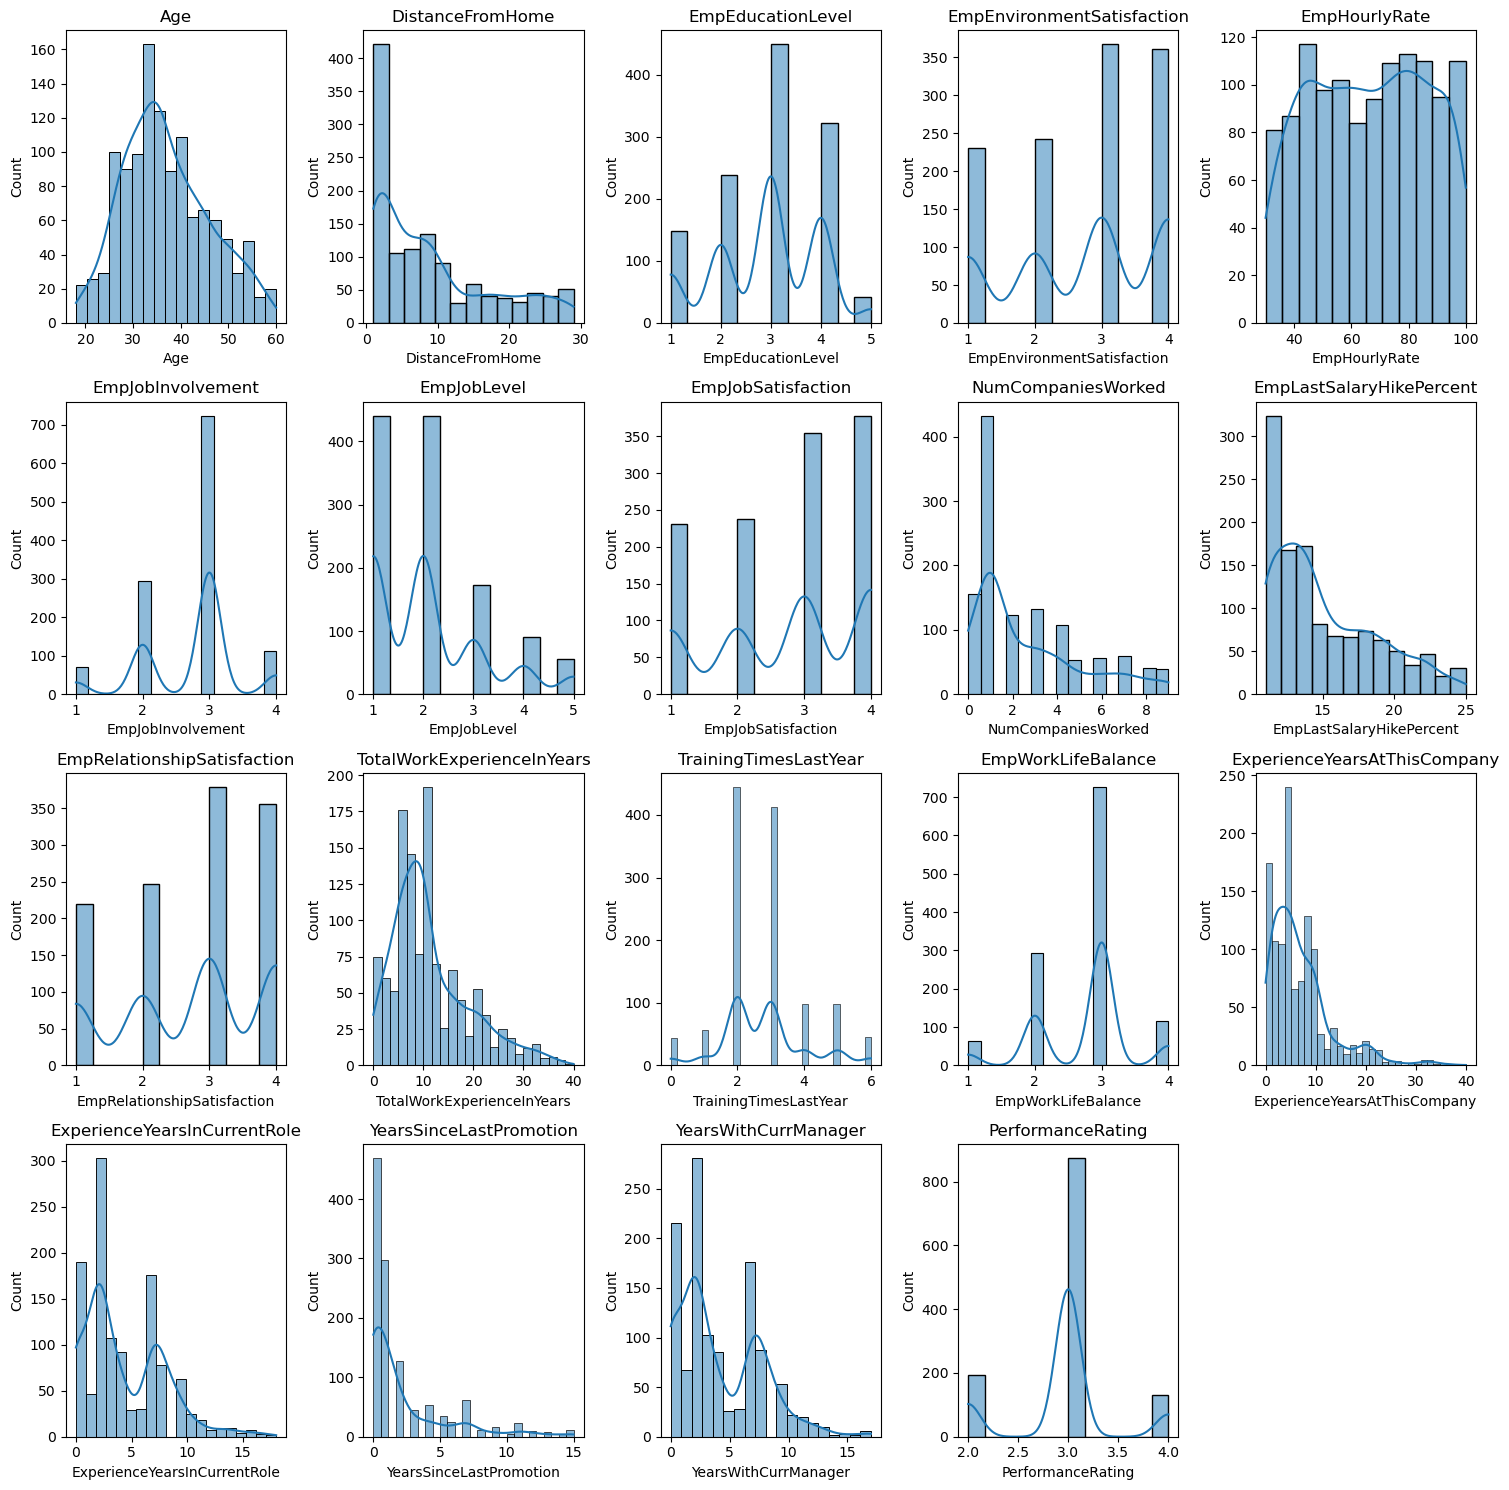

In [15]:
plt.figure(figsize=(15, 15))
plotnumber = 1

# Iterate through the column names in df_num
for i in df_num:
    plt.subplot(4, 5, plotnumber)
    sns.histplot(x=df[i], kde=True)  # Use df[col] to pass the numeric data for the x-axis
    plt.title(i)  # Set the title of the subplot as the column name
    plotnumber += 1

plt.tight_layout()
plt.show()



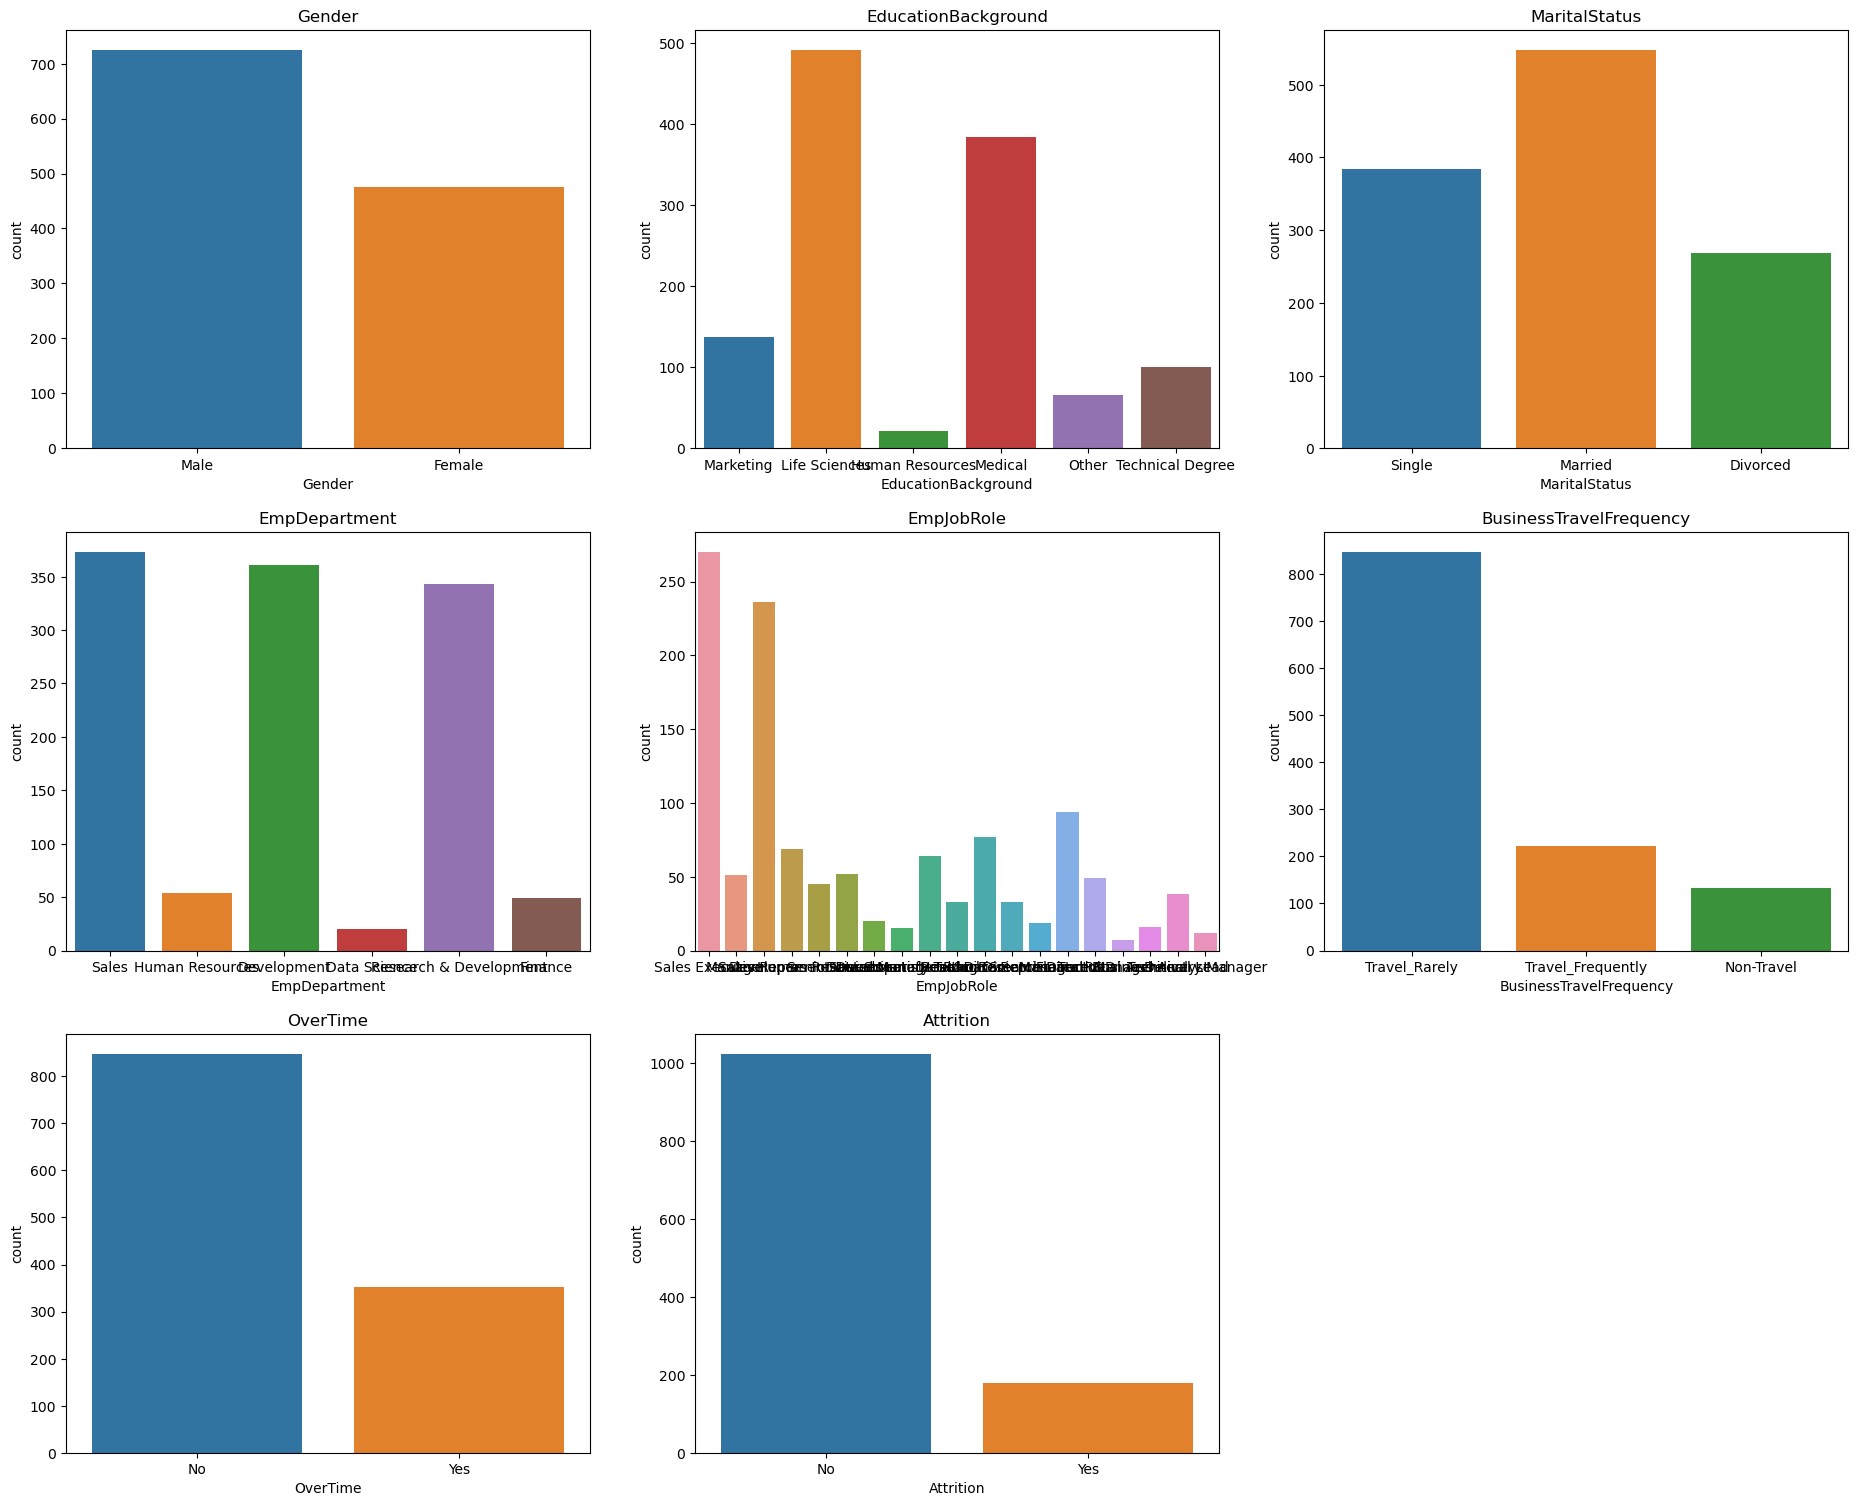

In [16]:
plt.figure(figsize=(23,25))
plotnumber=1

for i in df_cat:
    plt.subplot(4, 3, plotnumber)
    sns.countplot(x=df[i])  # Use df[col] to pass the numeric data for the x-axis
    plt.title(i)  # Set the title of the subplot as the column name
    plotnumber += 1

# Bivariant Analysis

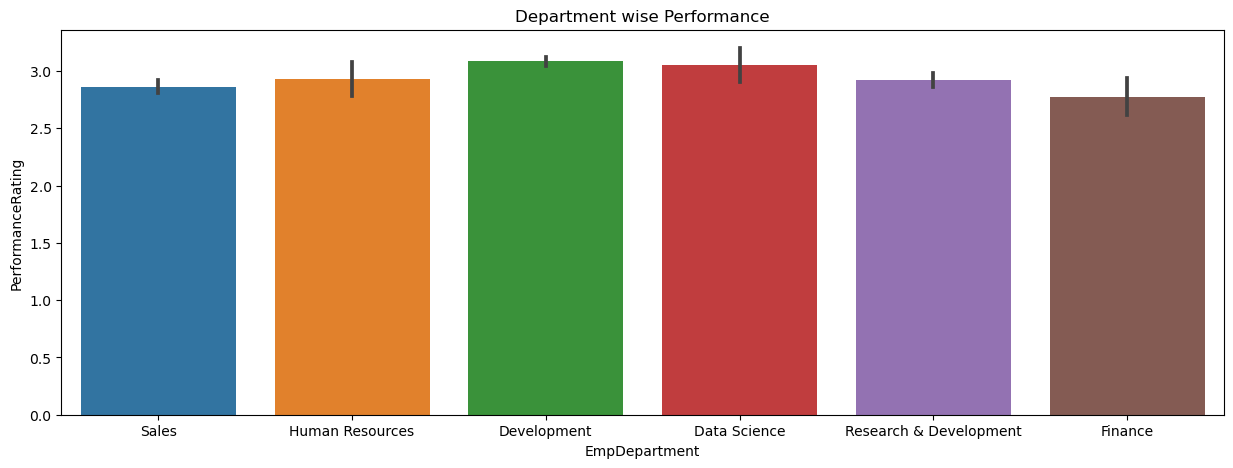

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title("Department wise Performance")
plt.show()

<Figure size 2000x1000 with 0 Axes>

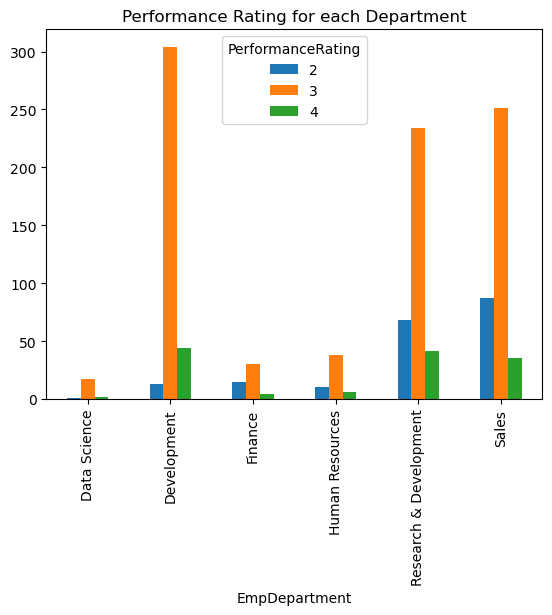

In [18]:
#Plotting all the Departments in one graph by using CrossTab
plt.figure(figsize=(20,10))
pd.crosstab(df.EmpDepartment,df.PerformanceRating).plot(kind='bar')
plt.xlabel('EmpDepartment')
plt.title("Performance Rating for each Department")
plt.show()

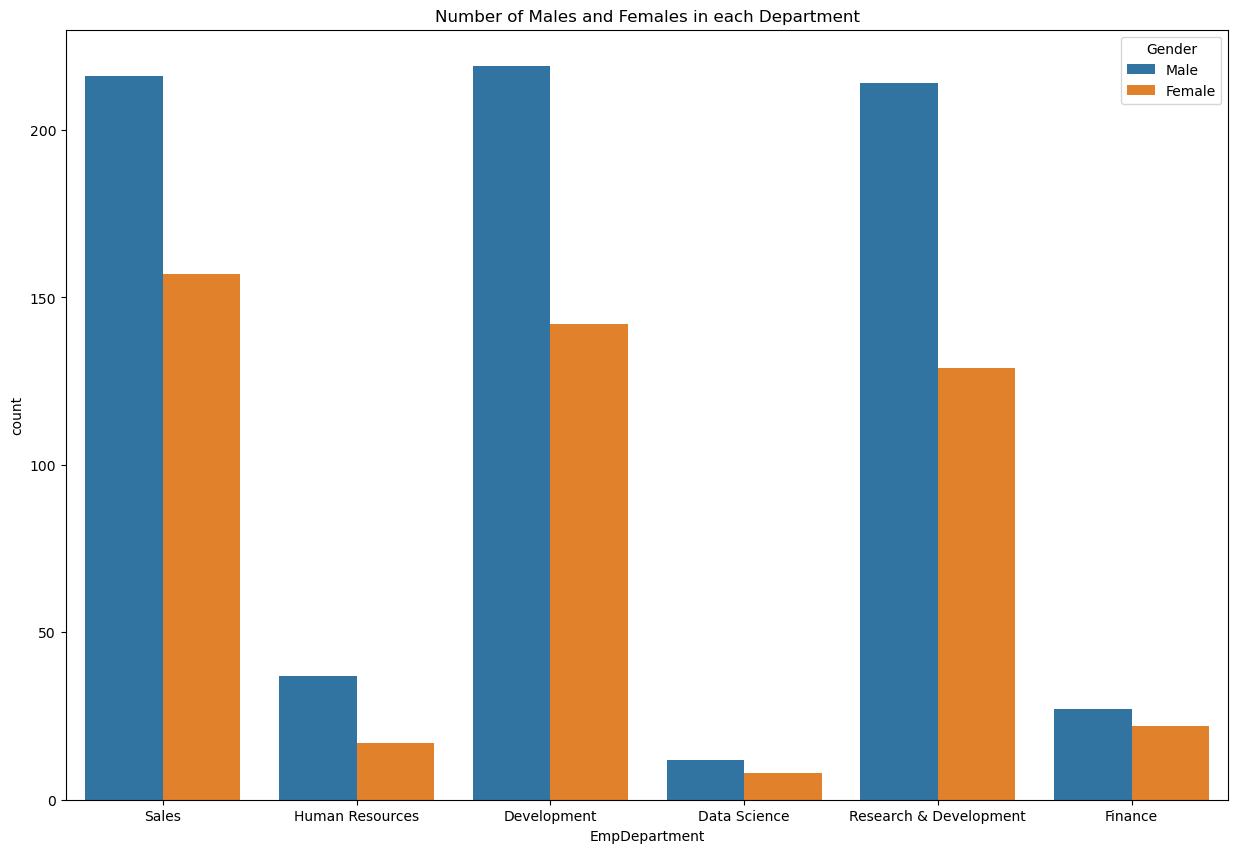

In [19]:
plt.figure(figsize=(15,10))
a=sns.countplot(x='EmpDepartment',hue='Gender',data=df)
plt.title('Number of Males and Females in each Department')
plt.show()

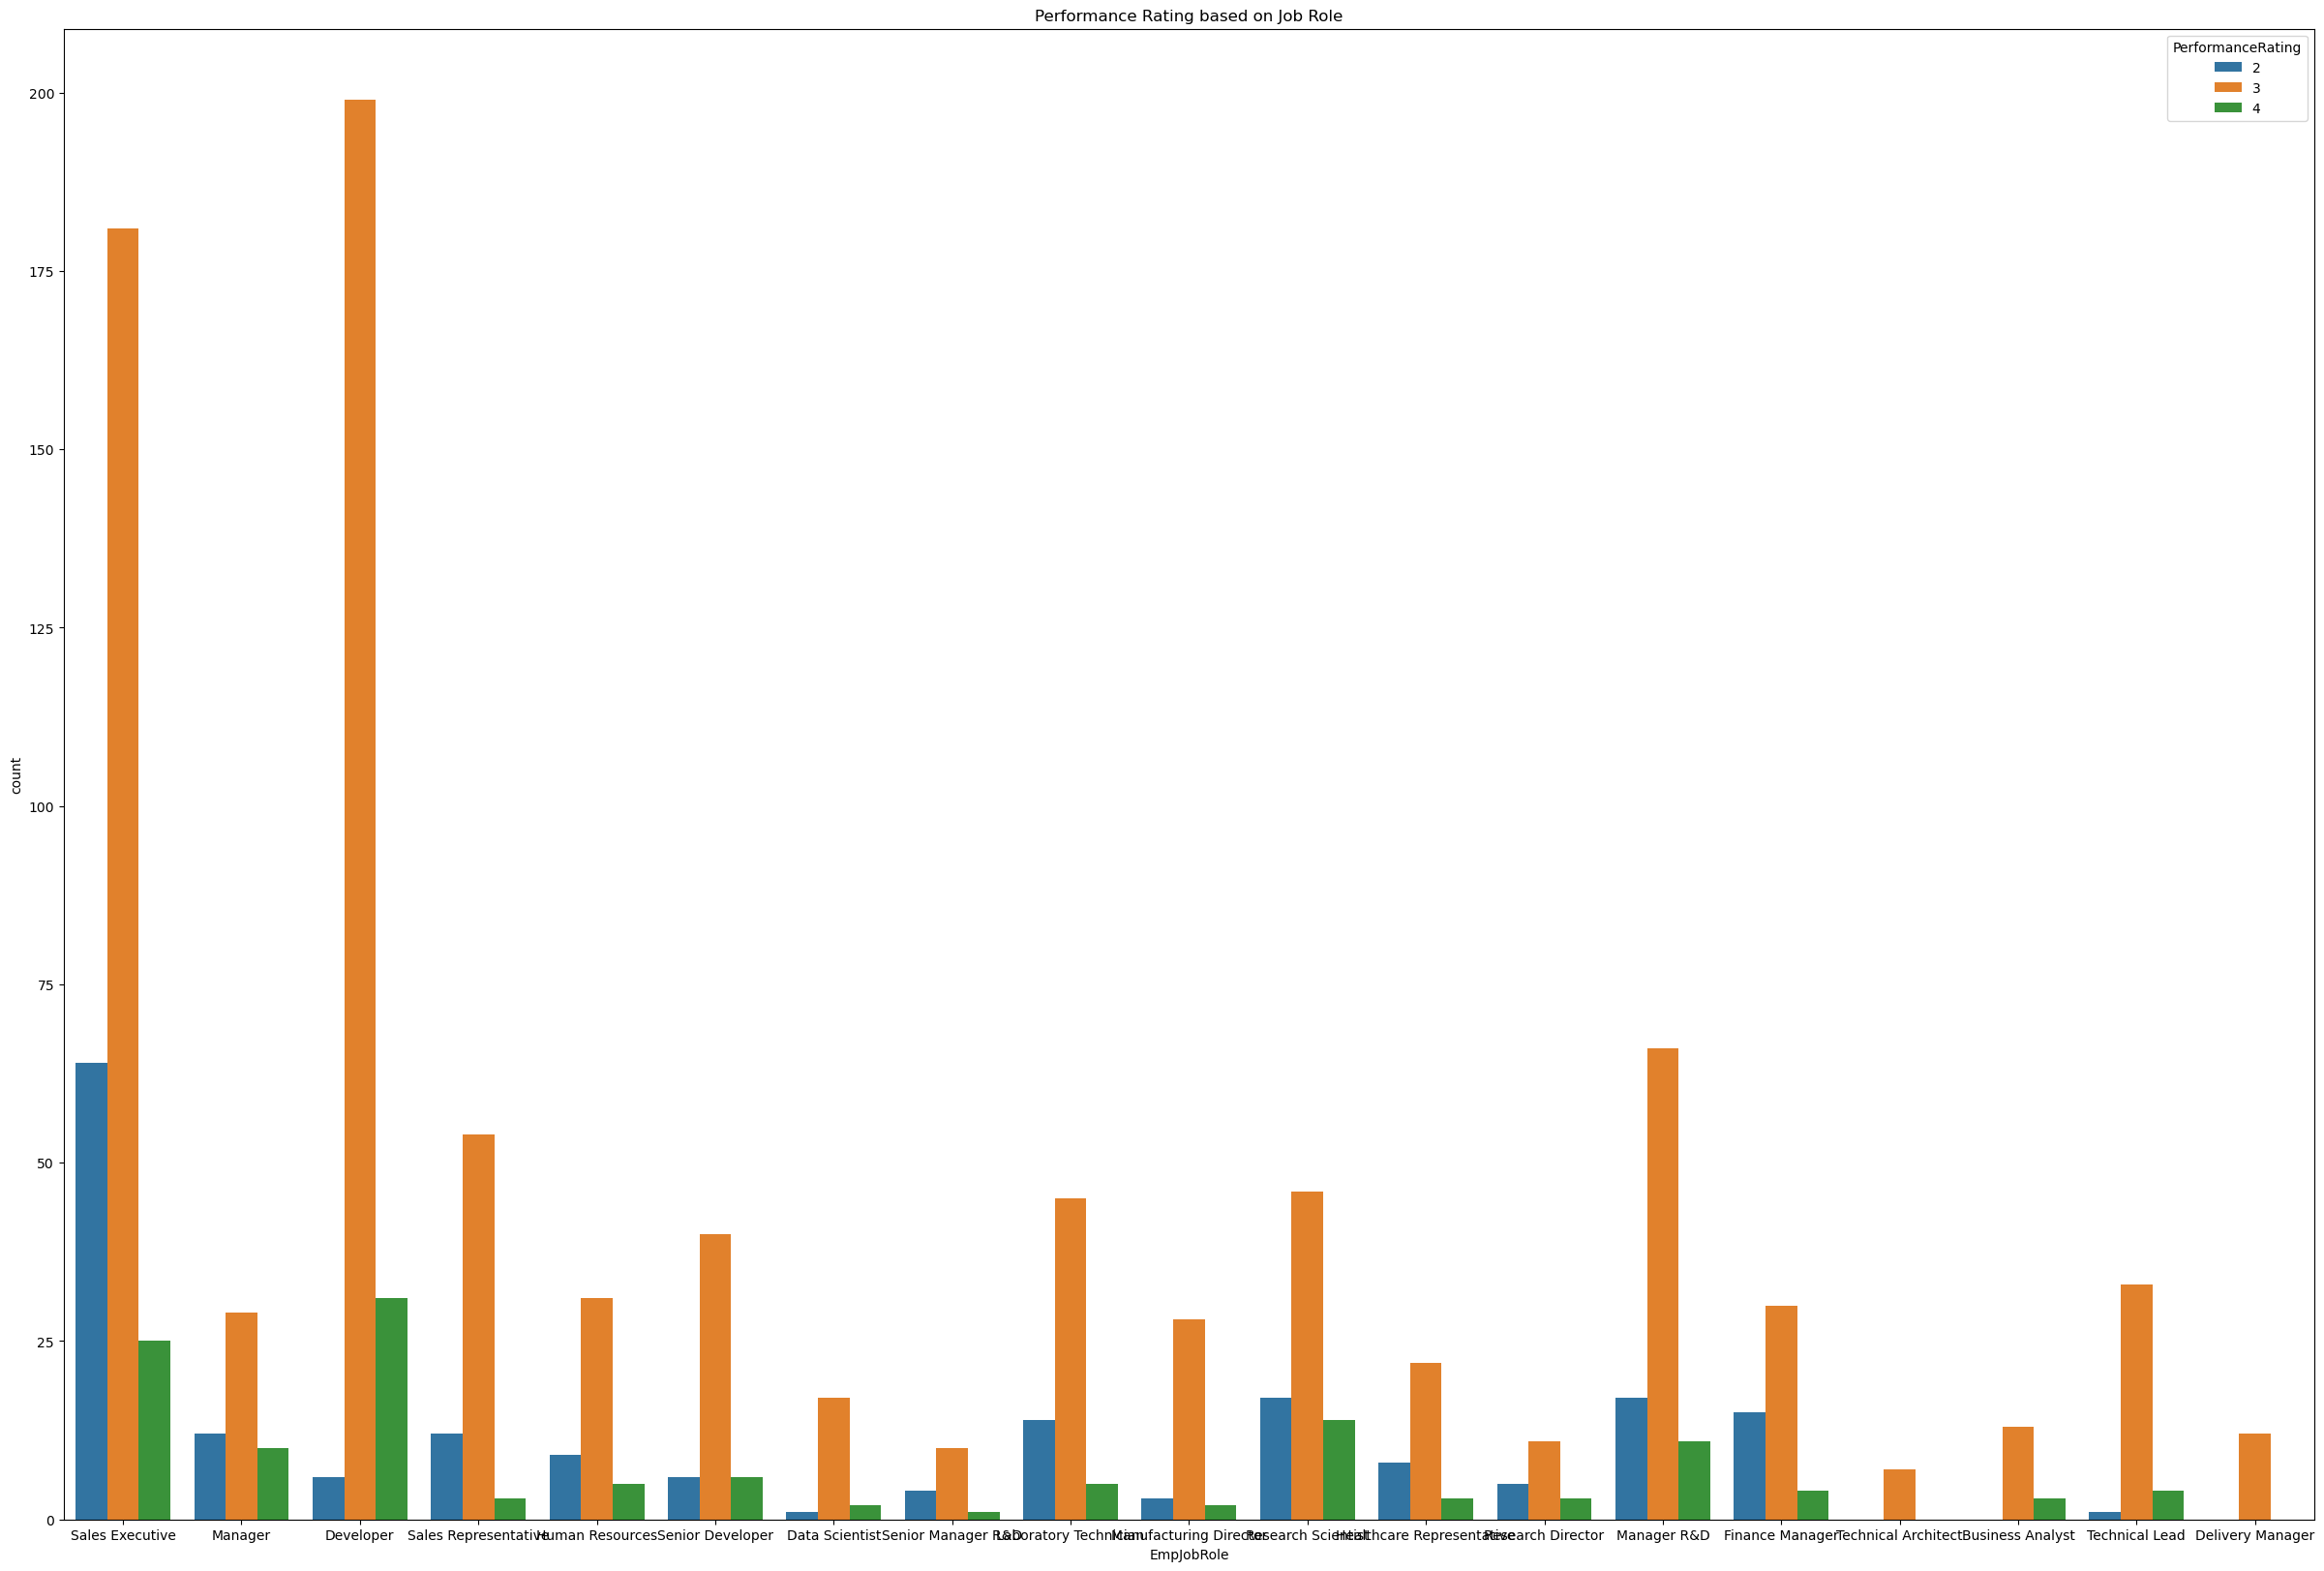

In [20]:
plt.figure(figsize=(30, 20))
sns.countplot(x='EmpJobRole', hue='PerformanceRating', data=df)
plt.title("Performance Rating based on Job Role")
plt.show()

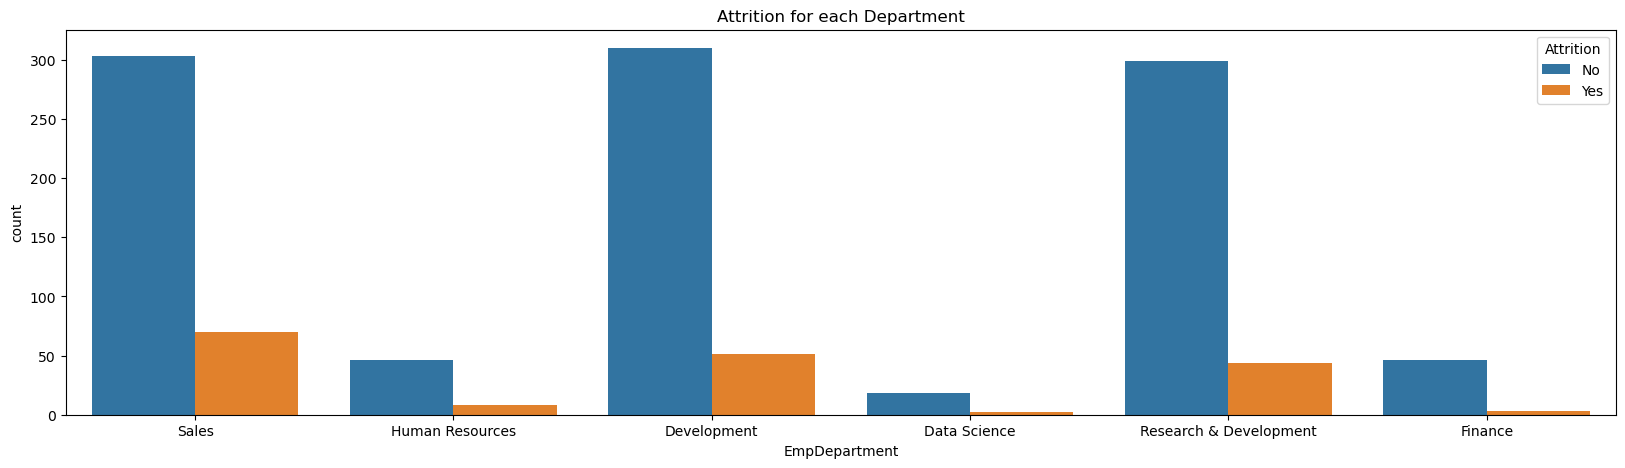

In [21]:
plt.figure(figsize=(20,5))
a=sns.countplot(x='EmpDepartment',hue='Attrition',data=df)
plt.title('Attrition for each Department')
plt.show()

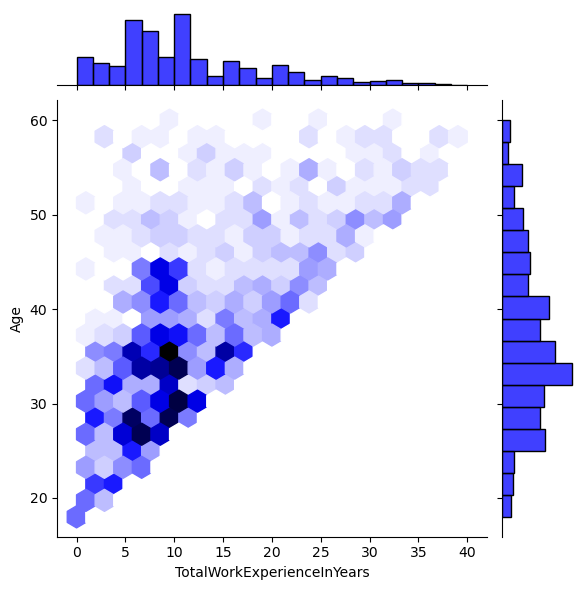

In [22]:
sns.jointplot(x=df.TotalWorkExperienceInYears,y=df.Age,kind='hex',color='blue')

In [23]:
#sns pairplot

# Data preprocessing

In [24]:
df.shape

(1200, 28)

In [25]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [26]:
df.size

33600

In [27]:
df.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [31]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [32]:
# converting categorical to numerical
#Converting Objects into integers
df.Age=enc.fit_transform(df.Age)
df.Attrition=enc.fit_transform(df.Attrition)
df.OverTime=enc.fit_transform(df.OverTime)
df.BusinessTravelFrequency=enc.fit_transform(df.BusinessTravelFrequency)
df.EmpJobRole=enc.fit_transform(df.EmpJobRole)
df.EmpDepartment=enc.fit_transform(df.EmpDepartment)
df.MaritalStatus =enc.fit_transform(df.MaritalStatus )
df.EducationBackground=enc.fit_transform(df.EducationBackground)
df.Gender =enc.fit_transform(df.Gender )
df.EmpNumber=enc.fit_transform(df.EmpNumber)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

In [34]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,14,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,29,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,22,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,23,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,42,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [35]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,1195,9,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,19,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,32,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,16,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3
1199,1199,6,0,1,2,5,13,2,3,2,...,1,4,3,3,2,2,2,0,1,2


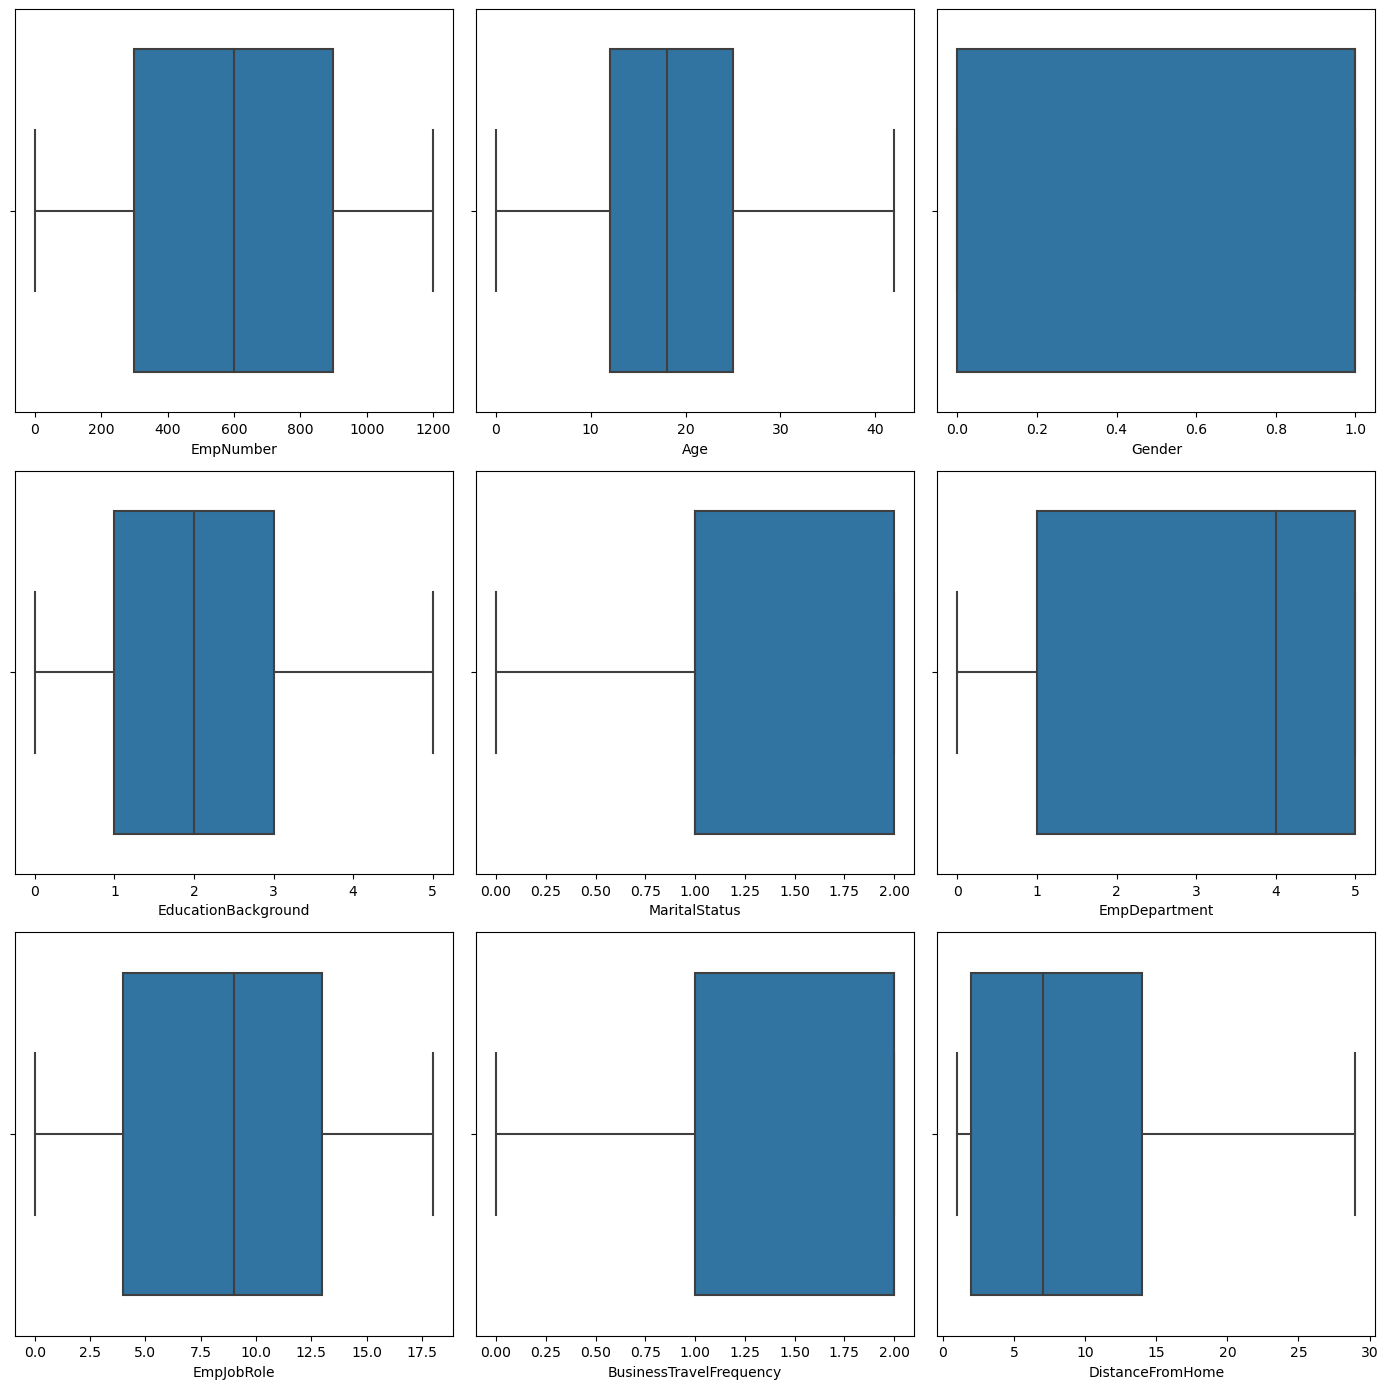

In [36]:
plt.figure(figsize=(14, 14))
plotnumber = 1

for i in df:
    plt.subplot(3, 3, plotnumber)
    sns.boxplot(x=df[i])
    plotnumber += 1
    if plotnumber > 9:
        break

plt.tight_layout()
plt.show()

## Feature Selection

In [37]:
df.corr()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,1.000000,-0.053137,0.025922,0.023819,-0.038128,-0.234279,-0.044182,0.050270,-0.023405,0.005844,...,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.020210,-0.003163
Age,-0.053137,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,0.025922,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,0.023819,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.038128,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.234279,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.044182,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.050270,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,-0.023405,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.005844,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529


<Axes: >

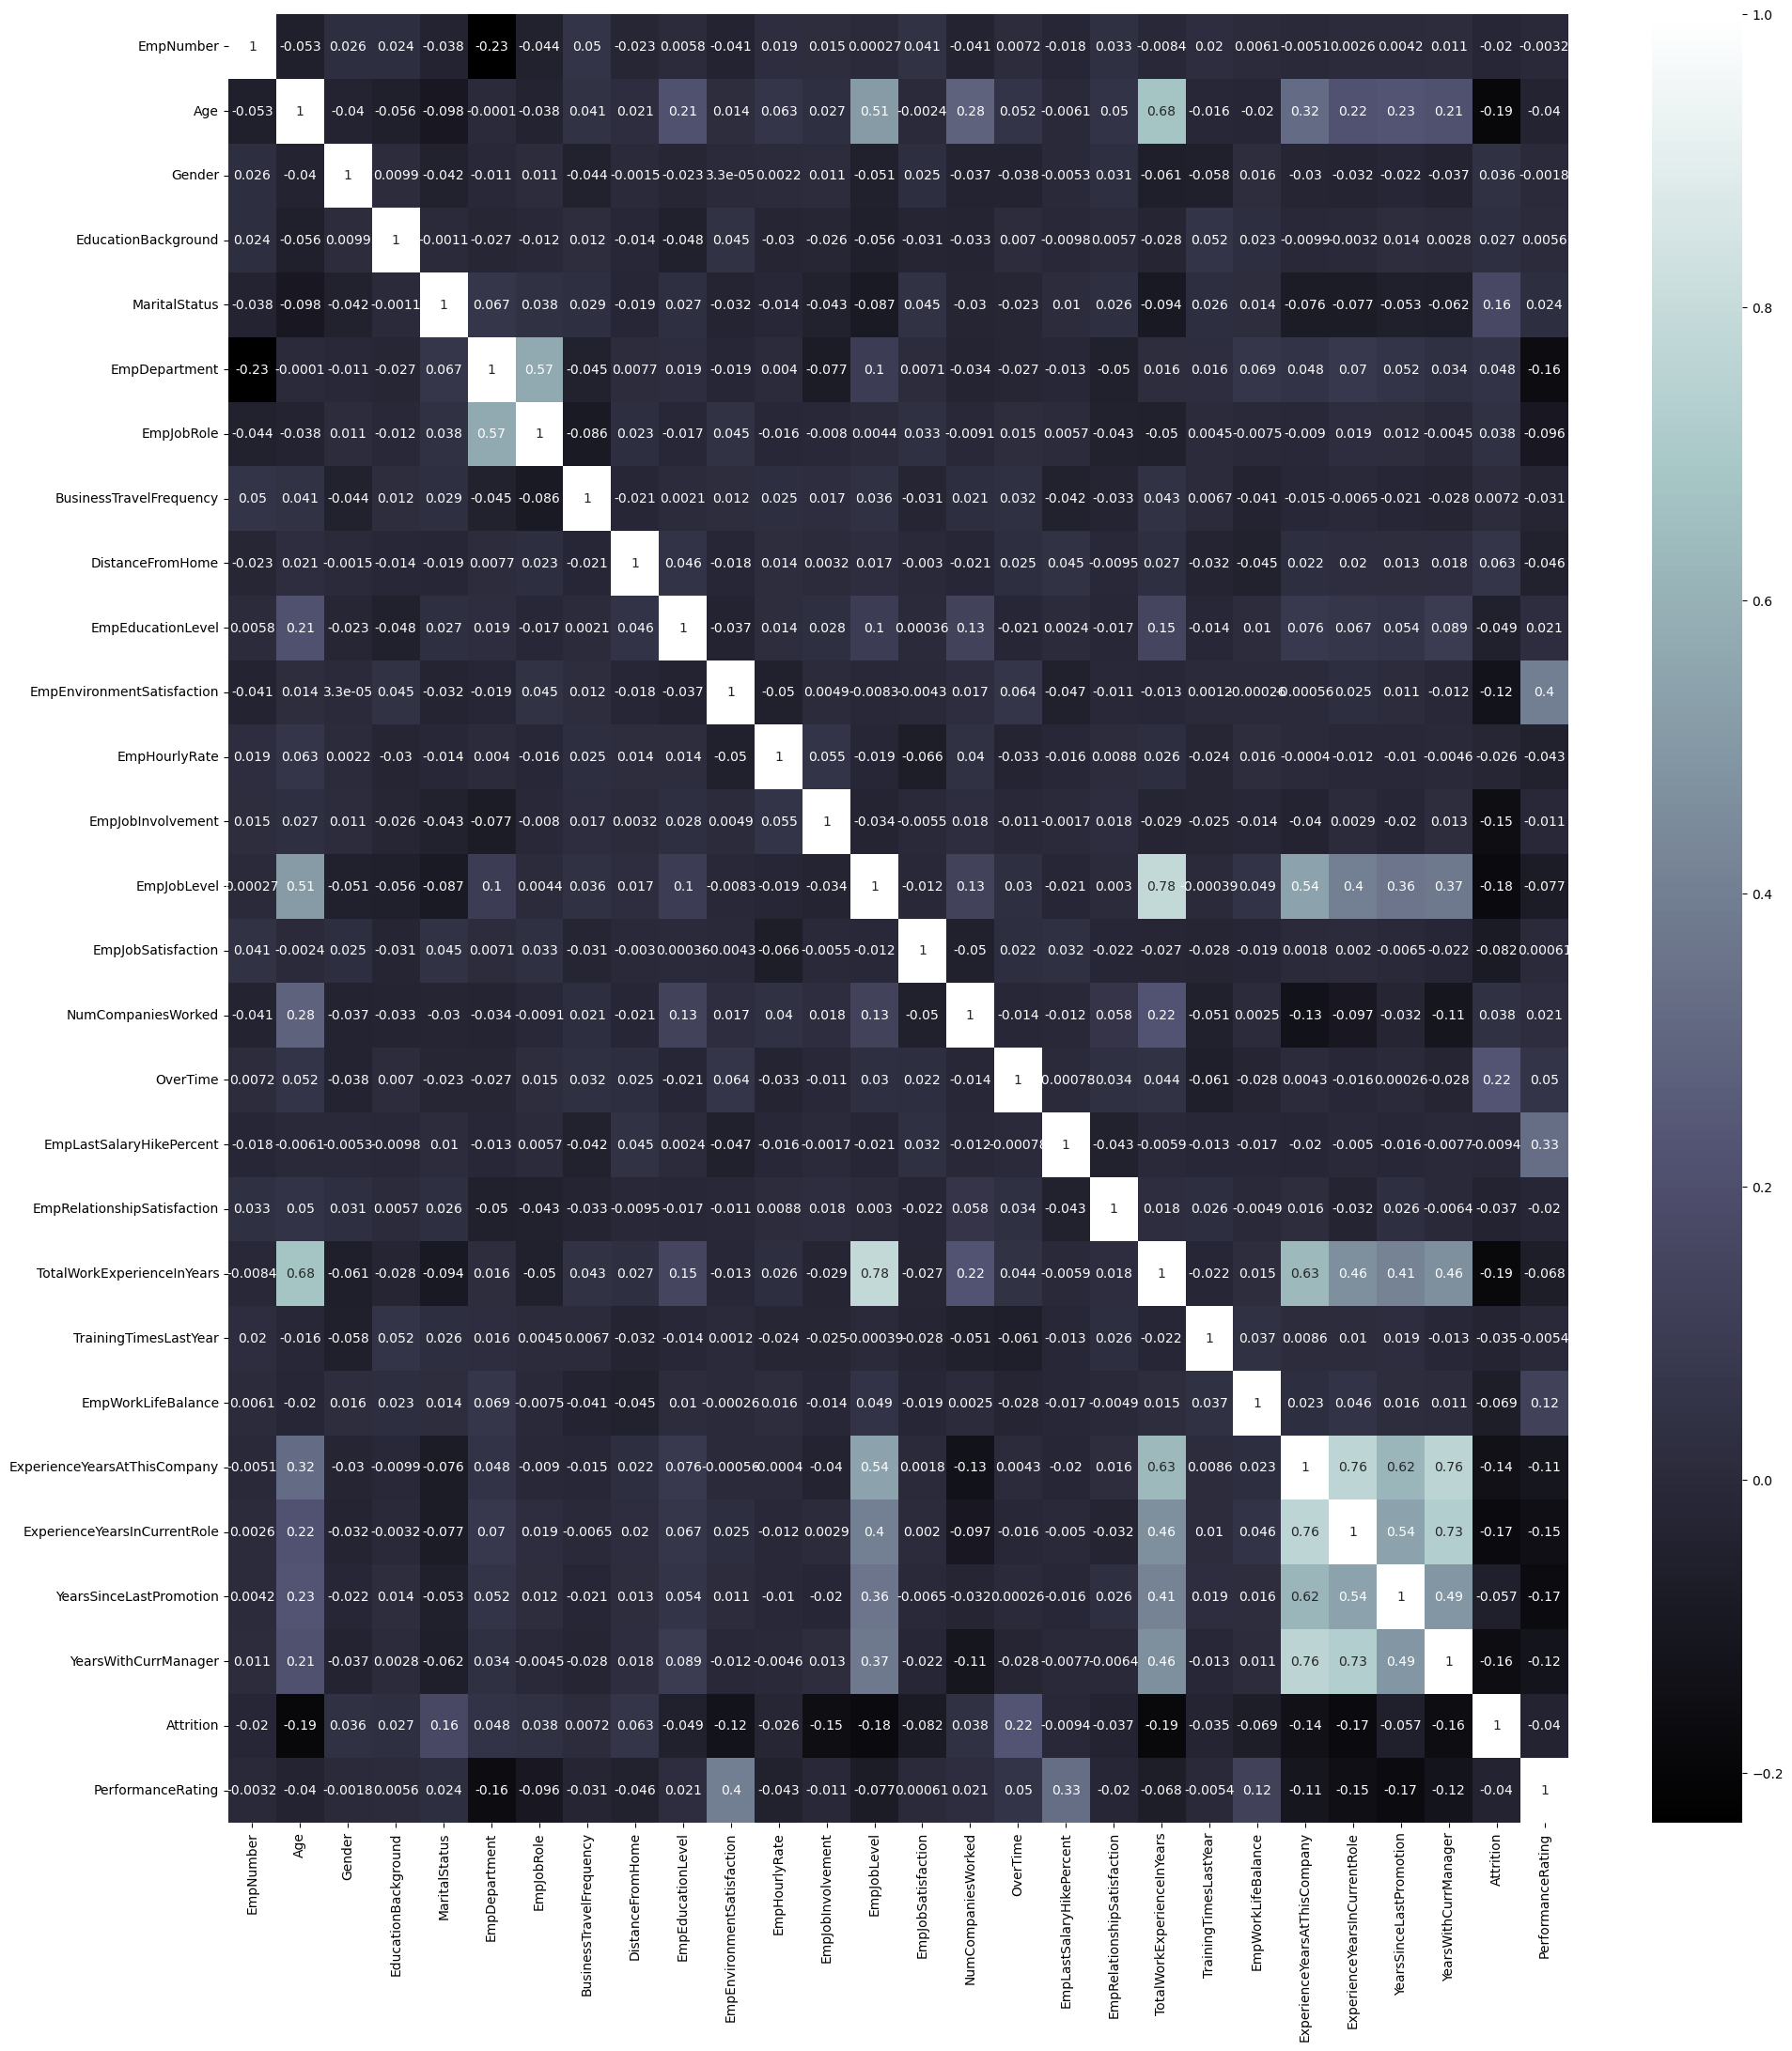

In [38]:
plt.figure(figsize=(23,25))
sns.heatmap(data=df.corr(),cmap='bone',annot=True)

In [39]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,14,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,29,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,22,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,23,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,42,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,9,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,19,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,32,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,16,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


# Model Creation

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [41]:
x=df.drop(['PerformanceRating','EmpNumber'],axis=1)
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,14,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,29,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,22,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,23,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,42,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


In [42]:
y=df.PerformanceRating
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [44]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1145,22,1,4,0,5,13,0,28,3,3,...,15,3,20,2,3,1,0,0,1,0
22,17,0,1,0,1,15,0,2,4,4,...,11,1,16,2,4,1,0,0,0,0
502,10,0,3,0,2,4,2,27,3,2,...,21,2,6,5,2,5,3,0,0,0
276,22,1,3,1,5,13,1,2,4,2,...,12,4,5,2,3,0,0,0,0,0
50,15,1,3,1,1,3,2,7,3,3,...,11,4,14,3,4,13,9,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,1,3,2,1,3,2,2,4,3,...,17,4,5,3,2,2,2,2,1,1
658,30,0,3,0,4,8,1,22,3,4,...,11,2,24,3,3,22,17,4,7,0
578,11,0,2,2,5,14,2,9,3,2,...,13,3,2,3,3,2,2,2,2,1
391,12,0,2,0,5,13,2,7,4,4,...,14,2,8,3,3,3,2,0,2,0


In [45]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1145,22,1,4,0,5,13,0,28,3,3,...,15,3,20,2,3,1,0,0,1,0
22,17,0,1,0,1,15,0,2,4,4,...,11,1,16,2,4,1,0,0,0,0
502,10,0,3,0,2,4,2,27,3,2,...,21,2,6,5,2,5,3,0,0,0
276,22,1,3,1,5,13,1,2,4,2,...,12,4,5,2,3,0,0,0,0,0
50,15,1,3,1,1,3,2,7,3,3,...,11,4,14,3,4,13,9,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10,1,3,2,1,3,2,2,4,3,...,17,4,5,3,2,2,2,2,1,1
658,30,0,3,0,4,8,1,22,3,4,...,11,2,24,3,3,22,17,4,7,0
578,11,0,2,2,5,14,2,9,3,2,...,13,3,2,3,3,2,2,2,2,1
391,12,0,2,0,5,13,2,7,4,4,...,14,2,8,3,3,3,2,0,2,0


In [46]:
y_train

1145    3
22      3
502     3
276     3
50      3
       ..
57      3
658     3
578     2
391     3
1044    3
Name: PerformanceRating, Length: 900, dtype: int64

# Logistic Regression

In [47]:
#Training Model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(multi_class='ovr')
LR.fit(x_train,y_train)


LogisticRegression(multi_class='ovr')

In [48]:
y_pred_lr = LR.predict(x_test)
y_pred_lr

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 4, 3, 2, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 3, 4, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3], d

In [49]:
acc = accuracy_score(y_test, y_pred_lr)
acc

0.74

In [50]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           2       0.64      0.37      0.47        57
           3       0.76      0.92      0.83       206
           4       0.67      0.32      0.44        37

    accuracy                           0.74       300
   macro avg       0.69      0.54      0.58       300
weighted avg       0.72      0.74      0.71       300



In [51]:
y_pred_train=LR.predict(x_train)
y_pred_train

array([3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 2,
       3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3,
       3, 4, 2, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [52]:
acc=accuracy_score(y_train,y_pred_train)
acc

0.8188888888888889

- using logistic regression we got accuracy 81%

# Random Forest

In [54]:
#Training the Model
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rf=Rf.predict(x_test)
y_pred_rf

array([3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 2, 3,
       3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 3, 4, 2, 3,
       3, 3, 4, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 2, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 4, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 2, 4, 3, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3], d

In [56]:
acc=accuracy_score(y_test,y_pred_rf)
acc

0.8866666666666667

In [57]:
y_pred_train=Rf.predict(x_train)
y_pred_train

array([3, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 2,
       3, 3, 3, 3, 4, 2, 3, 3, 3, 4, 4, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 2,
       3, 4, 2, 4, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4,
       3, 3, 3, 2, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,

In [58]:
acc=accuracy_score(y_train,y_pred_train)
acc

1.0

## Artificial Neural Network(ANN)

In [59]:
#training model
from sklearn.neural_network import MLPClassifier

In [60]:
MLP=MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=1,activation='relu',learning_rate_init=0.01)
MLP.fit(x_train,y_train)

MLPClassifier(batch_size=1, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01)

In [61]:
#Predicting the model
y_pred_mlp=MLP.predict(x_test)
y_pred_mlp

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [62]:
#finding accuracy_score and confusconfusion_matrix
acc=accuracy_score(y_test,y_pred_mlp)*100
acc

68.66666666666667

In [63]:
y_pred_train=MLP.predict(x_train)
y_pred_train

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [64]:
#finding accuracy_score and confusconfusion_matrix
acc=accuracy_score(y_train,y_pred_train)*100
acc

74.22222222222223

# Conclusion

- In conclusion, the employee performance analysis conducted at INX Future Inc. has yielded valuable insights into workforce productivity, engagement, and performance trends. 
- Top-performing employees have been identified, highlighting the potential for talent retention and development. The evaluation of key performance metrics has enabled a data-driven approach to decision-making and resource allocation. 
- Employee engagement levels have been assessed, providing valuable information for enhancing motivation and job satisfaction.     - The analysis has emphasized the importance of recognizing and rewarding high achievers to foster a culture of excellence. 
- Moving forward, implementing the recommended strategies, such as targeted skill development and performance monitoring, will undoubtedly improve organizational efficiency and contribute to the company's sustained success in a competitive landscape.